## 🌎 LOCATION-BASED – "Where are the crashes happening?"

Understanding where plane crashes occur is vital for identifying geographic risk zones, infrastructural challenges, and operational patterns. This section explores the **top crash hotspots**, provides **global density visualizations**, and breaks down incidents by **country and continent**.



In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('feature_engineered_crashes.csv')

# Display basic info
print(df.shape)
print(df.columns)
df.head()

(4972, 23)
Index(['date', 'time', 'location', 'operator', 'route', 'ac_type', 'aboard',
       'aboard_passangers', 'aboard_crew', 'fatalities',
       'fatalities_passangers', 'fatalities_crew', 'ground', 'summary', 'Year',
       'Month', 'Weekday', 'Decade', 'is_Military', 'Fatality_Rate',
       'Is_Fatal', 'Aircraft_Type_Simple', 'Crash_Location_Type'],
      dtype='object')


,date,time,location,operator,route,ac_type,aboard,aboard_passangers,aboard_crew,fatalities,...,summary,Year,Month,Weekday,Decade,is_Military,Fatality_Rate,Is_Fatal,Aircraft_Type_Simple,Crash_Location_Type
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,...,"During a demonstration flight, a U.S. Army fly...",1908,9,Thursday,1900,1,0.5,1,Other,Land
1,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,...,First U.S. dirigible Akron exploded just offsh...,1912,7,Friday,1910,1,1.0,1,Airship,Land
2,1913-08-06,Unknown,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,0.0,1.0,1.0,...,The first fatal airplane accident in Canada oc...,1913,8,Wednesday,1910,0,1.0,1,Seaplane,Land
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,0.0,0.0,14.0,...,The airship flew into a thunderstorm and encou...,1913,9,Tuesday,1910,1,0.7,1,Airship,Water
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),30.0,0.0,0.0,30.0,...,Hydrogen gas which was being vented was sucked...,1913,10,Friday,1910,1,1.0,1,Airship,Land


In [3]:
df[['location', 'Crash_Location_Type', 'summary']].head()

,location,Crash_Location_Type,summary
0,"Fort Myer, Virginia",Land,"During a demonstration flight, a U.S. Army fly..."
1,"Atlantic City, New Jersey",Land,First U.S. dirigible Akron exploded just offsh...
2,"Victoria, British Columbia, Canada",Land,The first fatal airplane accident in Canada oc...
3,Over the North Sea,Water,The airship flew into a thunderstorm and encou...
4,"Near Johannisthal, Germany",Land,Hydrogen gas which was being vented was sucked...


In [4]:
# If most entries end with country or state info, split location by comma and keep the last part
df['location_cleaned'] = df['location'].astype(str).apply(lambda x: x.split(',')[-1].strip() if ',' in x else x)

# View unique cleaned locations (used for country approximation)
df['location_cleaned'].value_counts().head(20)

location_cleaned
Russia         256
Brazil         176
Colombia       152
Canada         125
France         124
California     116
Alaska         103
India          102
England        100
Indonesia       98
China           91
Italy           86
Mexico          85
Germany         76
Philippines     72
USSR            67
Australia       62
Spain           58
Peru            55
New York        54
Name: count, dtype: int64

Q29: Top 15 countries with most aircraft crashes since 2000

In [14]:
# Filter for crashes from the year 2000 onward
df_2000 = df[df['Year'] >= 2000]

C:\Users\hp\AppData\Local\Temp\ipykernel_14468\524141197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="rocket")


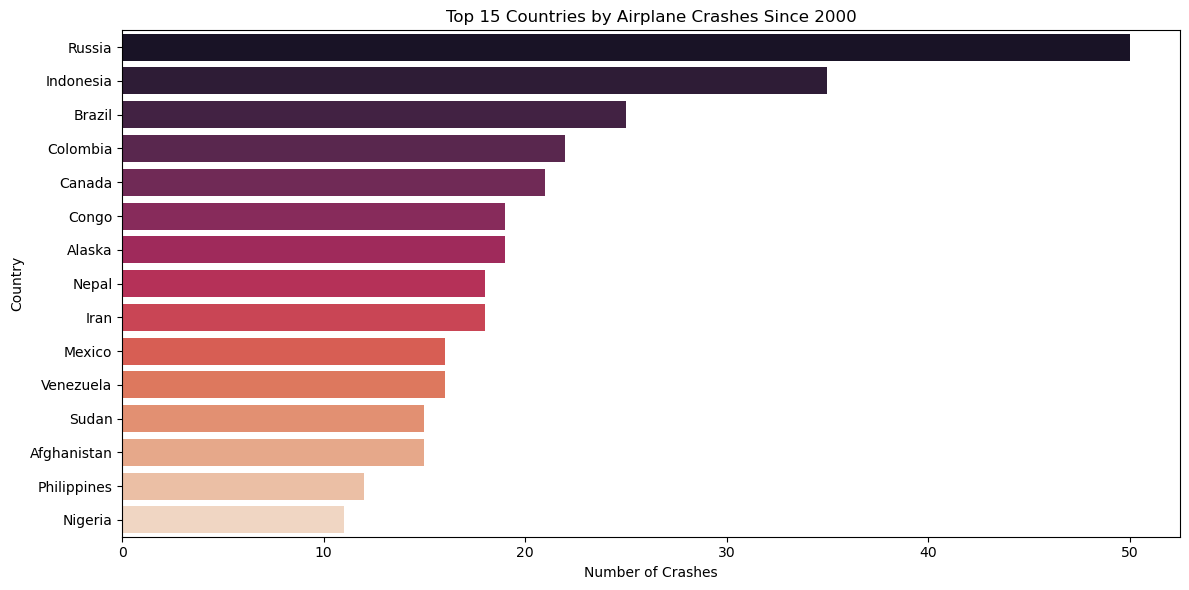

In [17]:
# Q1. Top 15 countries with most crashes since 2000
# -------------------------------
top_countries = df_2000['location_cleaned'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="rocket")
plt.title("Top 15 Countries by Airplane Crashes Since 2000")
plt.xlabel("Number of Crashes")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

- **Russia** has the highest number of aircraft crashes since 2000.
- Other top countries include **Indonesia**, **Brazil**, **Colombia**, and **Canada**.
- These countries typically have expansive airspaces, challenging terrains, or developing aviation infrastructures.


Q30. Region-wise distribution since 2000 (using 'Crash_Location_Type')

C:\Users\hp\AppData\Local\Temp\ipykernel_14468\3413338878.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_2000, x='Crash_Location_Type', order=df_2000['Crash_Location_Type'].value_counts().index, palette="pastel")


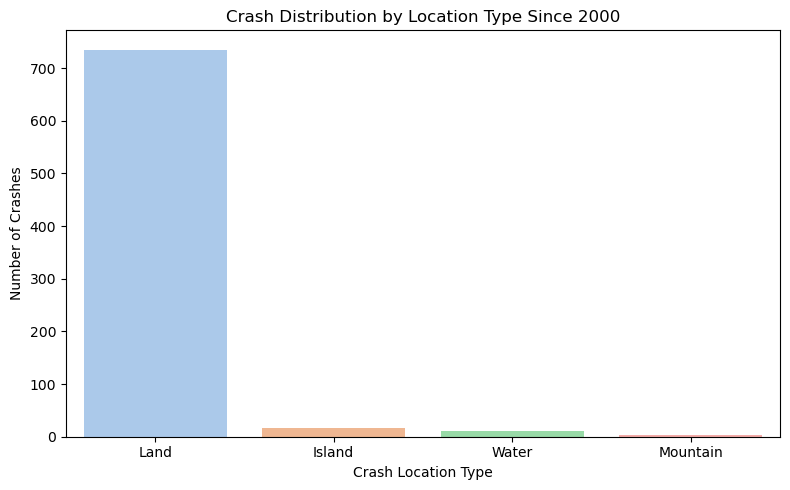

In [ ]:
# Region-wise distribution since 2000 (using 'Crash_Location_Type')
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df_2000, x='Crash_Location_Type', order=df_2000['Crash_Location_Type'].value_counts().index, palette="pastel")
plt.title("Crash Distribution by Location Type Since 2000")
plt.xlabel("Crash Location Type")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()

- The majority of crashes occurred **on land**.
- Crashes in **island**, **water**, and **mountain** locations are significantly fewer.
- This reflects aviation’s predominance over land routes and proximity to airports.


Q31: Top Crash Locations (City/Region) Since 2000:

C:\Users\hp\AppData\Local\Temp\ipykernel_14468\3217697733.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_regions.index, x=top_regions.values, palette="mako")


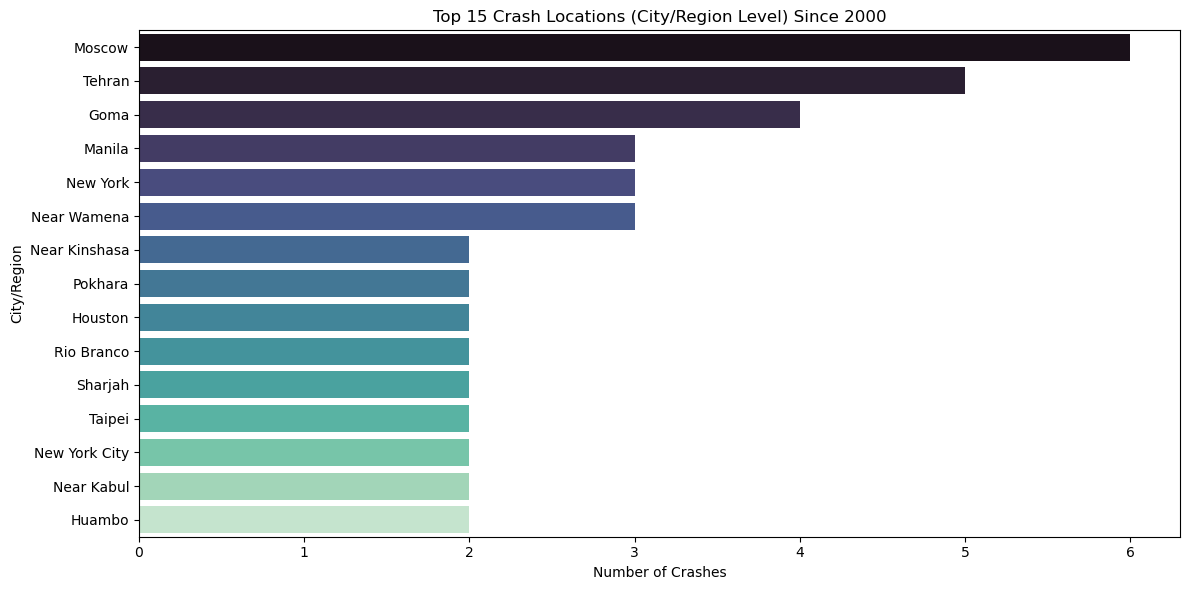

In [21]:
# Clean the 'location' column to remove country and extract city/state/region
def extract_region(location):
    if pd.isnull(location):
        return None
    parts = location.split(",")
    return parts[0].strip()  # Assuming first part is city/region

df['Region'] = df['location'].apply(extract_region)

# Filter data for year 2000 and beyond
df_2000 = df[df['Year'] >= 2000]

# Get top 15 crash locations (cities/regions)
top_regions = df_2000['Region'].value_counts().head(15)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(y=top_regions.index, x=top_regions.values, palette="mako")
plt.title("Top 15 Crash Locations (City/Region Level) Since 2000")
plt.xlabel("Number of Crashes")
plt.ylabel("City/Region")
plt.tight_layout()
plt.show()


- **Moscow** recorded the most crash events at the city/region level.
- Other notable crash locations include **Tehran**, **Goma**, **Manila**, and **New York**.
- High-frequency crash zones often correlate with air traffic volume or difficult approach paths.


## Summary: Location-Based Crash Insights

The crash data from 2000 onward shows distinct geographic trends:
- Crashes are more frequent in countries with vast land areas or growing aviation sectors.
- **Land-based crashes** dominate overall crash statistics.
- Several major cities appear repeatedly, hinting at high-risk urban or regional airspaces.
